# Denoise Autoencoder

* We can use the basic autoencoder we created earlier. But we have to retrain it on new noisy data.
* `input`: noisy data
* `output`: clean data
* Code learns to convert from noisy to clean data. *Warning: this is data specific!*

![](img/autoencoder_schema.jpg)

**Data**

We'll add noise to the original train and test images using `np.random.normal` to have a Gaussian distribution with mean 0 and std 1. 

We can then add a scale factor as we wish, like `0.5` and do not forget to *clip* between 0 and 1.

We need get the following dataset:


![](img/denoised_digits.png)

In [2]:
import tensorflow

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt

Let's rush to create and compile the model!

In [3]:
encoding_dim = 32  

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Now we import the dataset and **add some noise**.

In [4]:
from tensorflow.python.keras.datasets import mnist

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [5]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

And we can plot the result

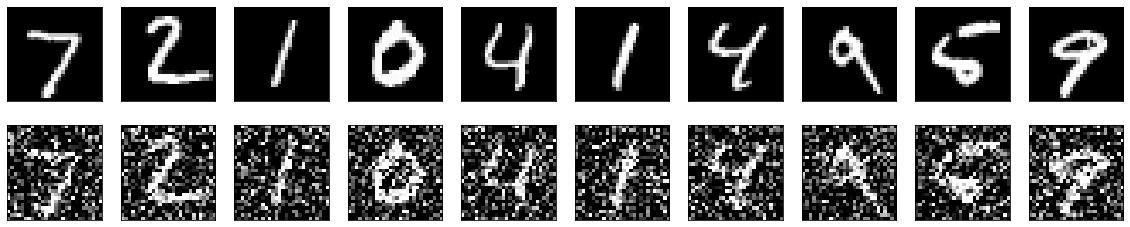

In [6]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display noisy
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Looks like an intersting problem!

Now the *trick* is to use as **input** the **noisy data** and as **output** against which we check the loss the **clean data**

In [7]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2846 - val_loss: 0.2143
Epoch 2/50
235/235 [==============================] - 1s 2ms/step - loss: 0.1991 - val_loss: 0.1839
Epoch 3/50
235/235 [==============================] - 1s 2ms/step - loss: 0.1768 - val_loss: 0.1682
Epoch 4/50
235/235 [==============================] - 1s 2ms/step - loss: 0.1636 - val_loss: 0.1565
Epoch 5/50
235/235 [==============================] - 1s 2ms/step - loss: 0.1534 - val_loss: 0.1481
Epoch 6/50
235/235 [==============================] - 1s 2ms/step - loss: 0.1464 - val_loss: 0.1422
Epoch 7/50
235/235 [==============================] - 1s 2ms/step - loss: 0.1414 - val_loss: 0.1381
Epoch 8/50
235/235 [==============================] - 1s 2ms/step - loss: 0.1381 - val_loss: 0.1356
Epoch 9/50
235/235 [==============================] - 1s 2ms/step - loss: 0.1361 - val_loss: 0.1343
Epoch 10/50
235/235 [==============================] - 1s 2ms/step - loss: 0.1348 - val_loss: 0.1332

The autoencoder has been trained. Now we can `predict` some digits from the **noisy** test set. 

In [8]:
 decoded_imgs = autoencoder.predict(x_test_noisy)

And now let's plot from the test set:
1. Noisy input
1. Reconstructed output
1. Target output

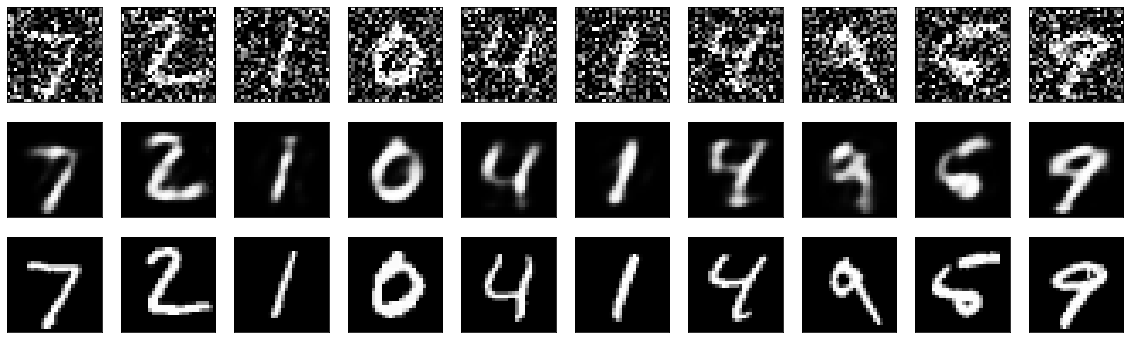

In [9]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original noisy
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display original
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()